# Evaluation of Regression Models

<center>From statistics to practice </center>

## Statistical Standards


- Robustness
- Effectiveness 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
data = pd.read_csv('indicepanel.csv',index_col=0)
ReturnPanel=pd.DataFrame()
ReturnPanel['Price']=data['sp500']
ReturnPanel['sp500']=np.log(data['sp500'])-np.log(data['sp500'].shift(1))
ReturnPanel['nikkei']=np.log(data['nikkei'])-np.log(data['nikkei'].shift(1))
ReturnPanel['aord']=np.log(data['aord'])-np.log(data['aord'].shift(1))
ReturnPanel['nyse']=np.log(data['nyse'])-np.log(data['nyse'].shift(1))
ReturnPanel['dax']=np.log(data['dax'])-np.log(data['dax'].shift(1))
ReturnPanel['ftse']=np.log(data['ftse'])-np.log(data['ftse'].shift(1))
ReturnPanel['hangseng']=np.log(data['hangseng'])-np.log(data['hangseng'].shift(1))
ReturnPanel['djia']=np.log(data['djia'])-np.log(data['djia'].shift(1))
ReturnPanel=ReturnPanel.dropna(axis=0)
ReturnPanel.head()


,Price,sp500,nikkei,aord,nyse,dax,ftse,hangseng,djia
2013-09-09,1655.08,0.000000,0.024545,0.006858,0.000000,0.000000,-0.002537,0.005705,0.000000
2013-09-10,1671.71,0.009998,0.015239,0.003758,0.012614,0.005007,0.008121,0.009885,0.008376
2013-09-11,1683.99,0.007319,0.000119,0.006079,0.008432,0.020358,0.000674,-0.001721,0.008458
2013-09-12,1689.13,0.003048,-0.002624,0.001452,0.003597,0.005807,0.000083,0.000723,0.008883
2013-09-13,1683.42,-0.003386,0.001209,-0.004496,-0.004990,-0.000204,-0.000786,-0.001676,-0.001695


In [2]:
dataMatrix=pd.DataFrame()
dataMatrix['Price']=ReturnPanel['Price']
dataMatrix['sp500']=ReturnPanel['sp500']
dataMatrix['sp500_lag']=ReturnPanel['sp500'].shift(1)
dataMatrix['nikkei']=ReturnPanel['nikkei']
dataMatrix['nikkei_lag']=ReturnPanel['nikkei'].shift(1)
dataMatrix['aord']=ReturnPanel['aord']
dataMatrix['aord_lag']=ReturnPanel['aord'].shift(1)
dataMatrix['hangseng']=ReturnPanel['hangseng']
dataMatrix['hangseng_lag']=ReturnPanel['hangseng'].shift(1)
dataMatrix['nyse_lag']=ReturnPanel['nyse'].shift(1)
dataMatrix['dax_lag']=ReturnPanel['dax'].shift(1)
dataMatrix['ftse_lag']=ReturnPanel['ftse'].shift(1)
dataMatrix['djia_lag']=ReturnPanel['djia'].shift(1)
dataMatrix=dataMatrix.dropna(axis=0)
dataMatrix.index=pd.to_datetime(dataMatrix.index)
dataMatrix.head()

,Price,sp500,sp500_lag,nikkei,nikkei_lag,aord,aord_lag,hangseng,hangseng_lag,nyse_lag,dax_lag,ftse_lag,djia_lag
2013-09-10,1671.71,0.009998,0.000000,0.015239,0.024545,0.003758,0.006858,0.009885,0.005705,0.000000,0.000000,-0.002537,0.000000
2013-09-11,1683.99,0.007319,0.009998,0.000119,0.015239,0.006079,0.003758,-0.001721,0.009885,0.012614,0.005007,0.008121,0.008376
2013-09-12,1689.13,0.003048,0.007319,-0.002624,0.000119,0.001452,0.006079,0.000723,-0.001721,0.008432,0.020358,0.000674,0.008458
2013-09-13,1683.42,-0.003386,0.003048,0.001209,-0.002624,-0.004496,0.001452,-0.001676,0.000723,0.003597,0.005807,0.000083,0.008883
2013-09-17,1697.60,0.008388,-0.003386,-0.006477,0.001209,0.005832,-0.004496,0.011508,-0.001676,-0.004990,-0.000204,-0.000786,-0.001695


In [3]:
print(dataMatrix.shape)
Train=dataMatrix.iloc[200:780,:]
Test=dataMatrix.iloc[780:,:]
print(Train.shape,Test.shape)

(974, 13)
(580, 13) (194, 13)


We build our multiple linear regression models with train. 

In [4]:
lm= smf.ols(formula='sp500~nikkei+nikkei_lag+aord+aord_lag+ftse_lag+hangseng+hangseng_lag ', data=Train).fit()

Then we can get our prediction for the train and test

In [5]:
# compute R2 adjusted R2, RMSE
Train_predict=lm.predict(Train)
Test_predict=lm.predict(Test)
sst_train=((Train['sp500']-Train['sp500'].mean())**2).sum()
sse_train=((Train['sp500']-Train_predict)**2).sum()
ssr_train=sst_train-sse_train
print("train:", sst_train,sse_train,ssr_train)
sst_test=((Test['sp500']-Test['sp500'].mean())**2).sum()
sse_test=((Test['sp500']-Test_predict)**2).sum()
ssr_test=sst_test-sse_test
print("train:", sst_test,sse_test,ssr_test)
train_rmse=(sse_train/(Train.shape[0]-7-1))**0.5
test_rmse=(sse_test/(Test.shape[0]-7-1))**0.5
r2_train=ssr_train/sst_train
r2_test=ssr_test/sst_test
adjust_r2_train=1-(1-r2_train)*(Train.shape[0]-1)/(Train.shape[0]-7-1)
adjust_r2_test=1-(1-r2_test)*(Test.shape[0]-1)/(Test.shape[0]-7-1)
print("Train: ", train_rmse,r2_train,adjust_r2_train)
print("Test: ", test_rmse,r2_test,adjust_r2_test)

train: 0.052172054542094476 0.03863998769509887 0.013532066846995608
train: 0.0035824082772029156 0.0027451168184888164 0.0008372914587140992
Train:  0.008219028290520883 0.2593738537951846 0.25031024711086003
Test:  0.003841704383801611 0.2337230694899584 0.20488469038474166


Then we compute SST,SSE, SSR

In [6]:
sst_train=((Train['sp500']-Train['sp500'].mean())**2).sum()
sse_train=((Train['sp500']-Train_predict)**2).sum()
ssr_train=sst_train-sse_train
print("train:", sst_train,sse_train,ssr_train)


train: 0.052172054542094476 0.03863998769509887 0.013532066846995608


In [7]:
sst_test=((Test['sp500']-Test['sp500'].mean())**2).sum()
sse_test=((Test['sp500']-Test_predict)**2).sum()
ssr_test=sst_test-sse_test
print("train:", sst_test,sse_test,ssr_test)

train: 0.0035824082772029156 0.0027451168184888164 0.0008372914587140992


Compute $R^2$,adjusted $R^2$, RMSE


In [8]:
train_rmse=(sse_train/(Train.shape[0]-7-1))**0.5
test_rmse=(sse_test/(Test.shape[0]-7-1))**0.5
r2_train=ssr_train/sst_train
r2_test=ssr_test/sst_test
adjust_r2_train=1-(1-r2_train)*(Train.shape[0]-1)/(Train.shape[0]-7-1)
adjust_r2_test=1-(1-r2_test)*(Test.shape[0]-1)/(Test.shape[0]-7-1)
print("Train: ", train_rmse,r2_train,adjust_r2_train)
print("Test: ", test_rmse,r2_test,adjust_r2_test)


Train:  0.008219028290520883 0.2593738537951846 0.25031024711086003
Test:  0.003841704383801611 0.2337230694899584 0.20488469038474166


We have the following conclusion
1. The model is robust, $R^2$ remains the same, $RMSE$ even smaller
2. The test data has smaller Adjusted $R^2$ because adjusted $R^2$ punish the fitness measure for small sample size. 

But still, a natural question raises: how large the difference between train and test is , we call they are different ?|

All these questions are not questions in practice 

## Practical Standards

We use model to build trading signal. Performance of  trading based on your signal is the practical standard of your models. 


- Drawdown:the percentage decline in the strategy from the historical peak profit at each point in time. 
    

- Average Daily return 
  $$
  (1+r)^{days}=1+R
  $$
  where $r$ is average Daily return and $R$ is total return.  


- Sharpe ratio: The ratio measures the excess return (or risk premium) per unit of deviation in an investment asset or a trading strategy, typically referred to as risk, named after William F. Sharpe
$$
SR=\frac{E(R_a-R_b)}{\sqrt{Var(R_a-R_b)}}
$$
Suppose the daily Shape ratio is $SR_{Day}$. Then yearly Shape ratio is 
$$
SR_{Year}=\sqrt{220}SR_{Day}
$$

### Trading strategy


- Benchmark Strategy I: Buy and Hold

- Benchmark Strategy II: Persistent strategy, if last day's return is postive , we buy today, otherwise we short sell 

- Signal-based Strategy: If Signal is postive , we buy, otherwise we short sell. 

### What we trade


 S&P 500 ETF (Exchanged traded fund)- SPY 

# Signal-based Stratgy

In [9]:
Trade_Train=pd.DataFrame()
Trade_Train['Price']=Train['Price']
Trade_Train['Signal']=Train_predict
Trade_Train.head()


,Price,Signal
2014-07-09,1963.71,-0.004444
2014-07-10,1972.83,-0.002017
2014-07-11,1964.68,-0.001045
2014-07-14,1964.68,0.002429
2014-07-15,1977.10,0.003539


In [10]:
Trade_Test=pd.DataFrame()
Trade_Test['Price']=Test['Price']
Trade_Test['Signal']=Test_predict
Trade_Test.head()

,Price,Signal
2016-11-22,2198.18,0.003352
2016-11-24,2204.72,0.004544
2016-11-25,2204.72,0.003104
2016-11-28,2204.72,-0.000277
2016-11-29,2201.72,-0.000763


In [11]:
Trade_Train['Order']=[1 if sig>0 else -1 for sig in Trade_Train['Signal']  ]
Trade_Train['Price_change']=Trade_Train['Price']-Trade_Train['Price'].shift(1)
Trade_Train['Profit']=Trade_Train['Price_change']*Trade_Train['Order']
print(Trade_Train['Profit'].sum())
Trade_Train['Wealth']=np.cumsum(Trade_Train['Profit'])+Trade_Train['Price'][0]
Trade_Train.head()

3989.610000000003


,Price,Signal,Order,Price_change,Profit,Wealth
2014-07-09,1963.71,-0.004444,-1,NaN,NaN,NaN
2014-07-10,1972.83,-0.002017,-1,9.12,-9.12,1954.59
2014-07-11,1964.68,-0.001045,-1,-8.15,8.15,1962.74
2014-07-14,1964.68,0.002429,1,0.00,0.00,1962.74
2014-07-15,1977.10,0.003539,1,12.42,12.42,1975.16


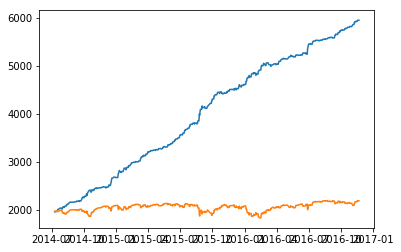

In [12]:
plt.plot(Trade_Train['Wealth'])
plt.plot(Trade_Train['Price'])

In [15]:
Trade_Test['Order']=[1 if sig>0 else -1 for sig in Trade_Test['Signal']  ]
Trade_Test['Price_change']=Trade_Test['Price']-Trade_Test['Price'].shift(1)
Trade_Test['Profit']=Trade_Test['Price_change']*Trade_Test['Order']
print(Trade_Test['Profit'].sum())
Trade_Test['Wealth']=np.cumsum(Trade_Test['Profit'])+Trade_Test['Price'][0]
Trade_Test.head()

669.3899999999985


,Price,Signal,Order,Price_change,Profit,Wealth
2016-11-22,2198.18,0.003352,1,NaN,NaN,NaN
2016-11-24,2204.72,0.004544,1,6.54,6.54,2204.72
2016-11-25,2204.72,0.003104,1,0.00,0.00,2204.72
2016-11-28,2204.72,-0.000277,-1,0.00,-0.00,2204.72
2016-11-29,2201.72,-0.000763,-1,-3.00,3.00,2207.72


669.3899999999985


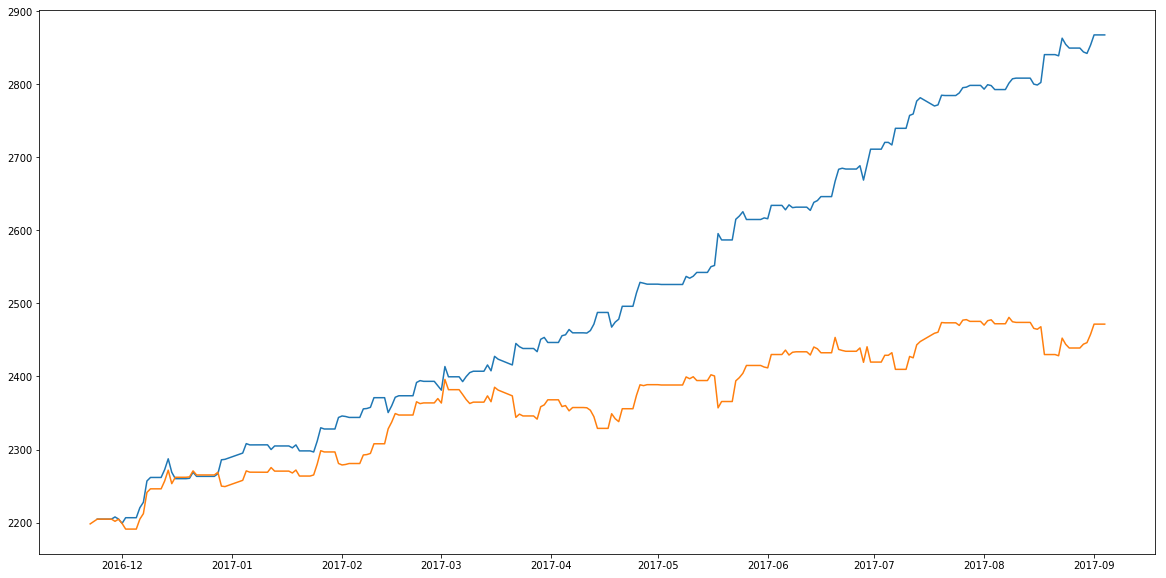

In [14]:
plt.figure(figsize=(20,10))
plt.plot(Trade_Test['Wealth'])
plt.plot(Trade_Test['Price'])
print(Trade_Test['Profit'].sum())

## sharpe ratio

In [15]:
Trade_Test.head()
# daily return
Trade_Test['Return']=(Trade_Test['Wealth']
                      -Trade_Test['Wealth'].shift(1))/Trade_Test['Wealth'].shift(1)
dailyr=Trade_Test['Return'].dropna()
print("daily sharpe ratio is ", dailyr.mean()/dailyr.std(ddof=1))
print("yearly sharpe ratio is", (220**0.5)*dailyr.mean()/dailyr.std(ddof=1))

daily sharpe ratio is  0.35527189022345096
yearly sharpe ratio is 5.269533709565548


In [19]:
print(10)

10


### Drawdown 

In [16]:
# list comprehension 
Trade_Test['Peak']=[Trade_Test['Wealth'].loc[:any_index].max() 
                    for any_index in Trade_Test.index ]
Trade_Test['Drawdown']=(Trade_Test['Wealth']-Trade_Test['Peak'])/Trade_Test['Peak']
Trade_Test

,Price,Signal,Order,Price_change,Profit,Wealth,Return,Peak,Drawdown
2016-11-22,2198.18,0.003352,1,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-24,2204.72,0.004544,1,6.54,6.54,2204.72,NaN,2204.72,0.000000
2016-11-25,2204.72,0.003104,1,0.00,0.00,2204.72,0.000000,2204.72,0.000000
2016-11-28,2204.72,-0.000277,-1,0.00,-0.00,2204.72,0.000000,2204.72,0.000000
2016-11-29,2201.72,-0.000763,-1,-3.00,3.00,2207.72,0.001361,2207.72,0.000000
2016-11-30,2204.66,-0.001590,-1,2.94,-2.94,2204.78,-0.001332,2207.72,-0.001332
2016-12-01,2198.81,0.003008,1,-5.85,-5.85,2198.93,-0.002653,2207.72,-0.003981
2016-12-02,2191.08,-0.000984,-1,-7.73,7.73,2206.66,0.003515,2207.72,-0.000480
2016-12-05,2191.08,-0.004716,-1,0.00,-0.00,2206.66,0.000000,2207.72,-0.000480
2016-12-06,2204.71,0.000844,1,13.63,13.63,2220.29,0.006177,2220.29,0.000000


In [59]:
print("Maximum drawdown rate is", Trade_Test['Drawdown'].min())


Maximum drawdown rate is -0.0118873781314
